In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\sample data\Customer Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### convert the data type of totalcharges object to float

In [4]:
df['TotalCharges']=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [5]:
df['TotalCharges'].dtype

dtype('float64')

### fill nul values

In [6]:
df.fillna({'TotalCharges':df['TotalCharges'].mean()},inplace=True)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

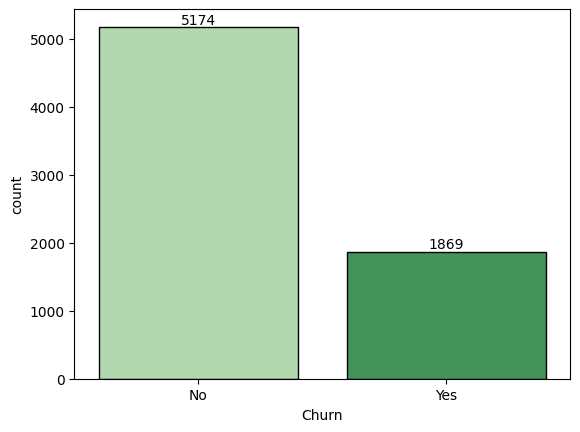

In [8]:
ax=sns.countplot(data=df,x='Churn',edgecolor="black",palette='Greens')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

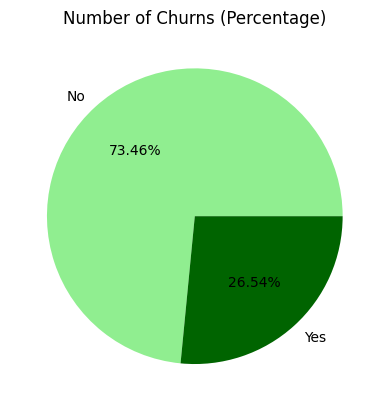

In [9]:
gb = df.groupby("Churn").agg({"Churn": "count"})
color=["lightgreen","darkgreen"]
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%",colors=color)
plt.title("Number of Churns (Percentage)") 
plt.show()

### from the given chart 26.54% customer has been churn out around numbers 1869

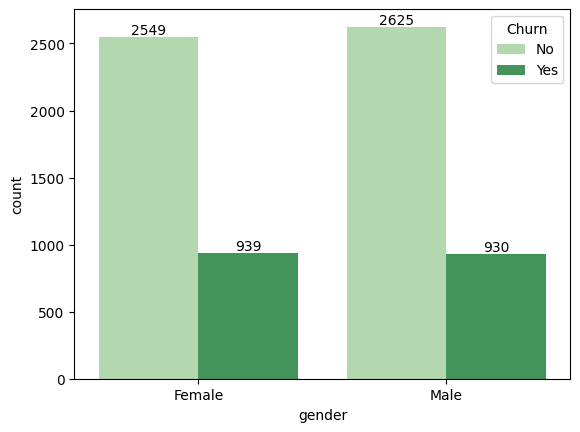

In [10]:
ax=sns.countplot(data=df,x="gender",hue="Churn",palette="Greens")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

### from the above graph we analyse that gender is not that much involve in churn

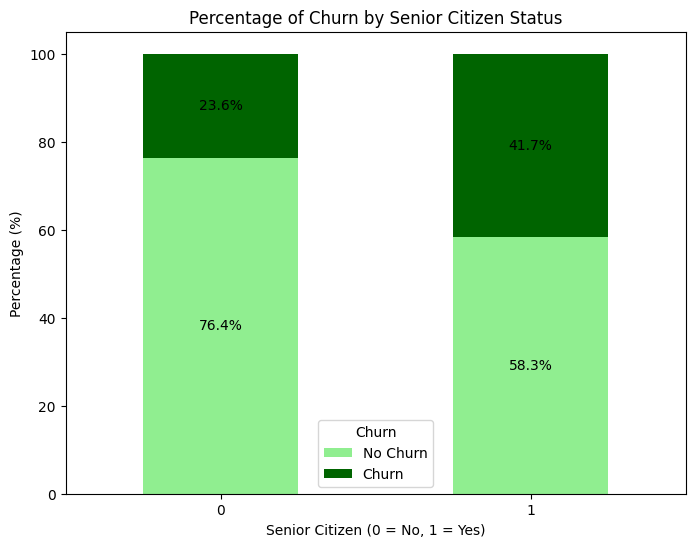

In [11]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Calculate percentage of each category
total_counts = count_data.groupby('SeniorCitizen')['Count'].transform(sum)
count_data['Percentage'] = count_data['Count'] / total_counts * 100

# Pivot the DataFrame for plotting
pivot_data = count_data.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

# Plotting the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, color=['lightgreen', 'darkgreen'], figsize=(8, 6))

# Adding percentage labels on the bars
for i in range(len(pivot_data)):
    for j in range(len(pivot_data.columns)):
        count = pivot_data.values[i][j]
        if count > 0:  # Avoid labeling empty bars
            ax.text(i, count / 2 + (pivot_data.iloc[i, :j].sum() if j > 0 else 0), 
                    f"{count:.1f}%", 
                    ha='center', va='center')

# Adding labels and title
plt.title('Percentage of Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


### from the above graph we observe that senior citizen churn rate is high 

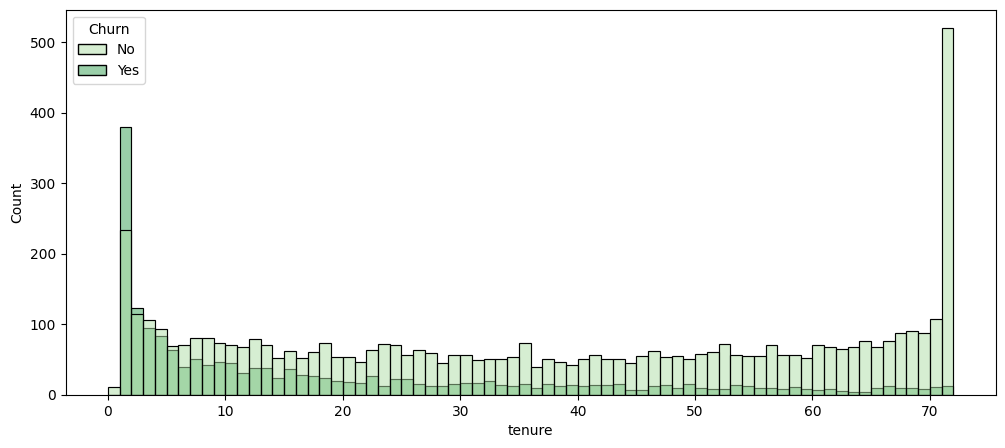

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(x="tenure",data=df,hue="Churn",bins=72,palette='Greens')
plt.show()

### from the above chart we observe that mainly 1 tenure is churning out most 

### People who have used our servicer 

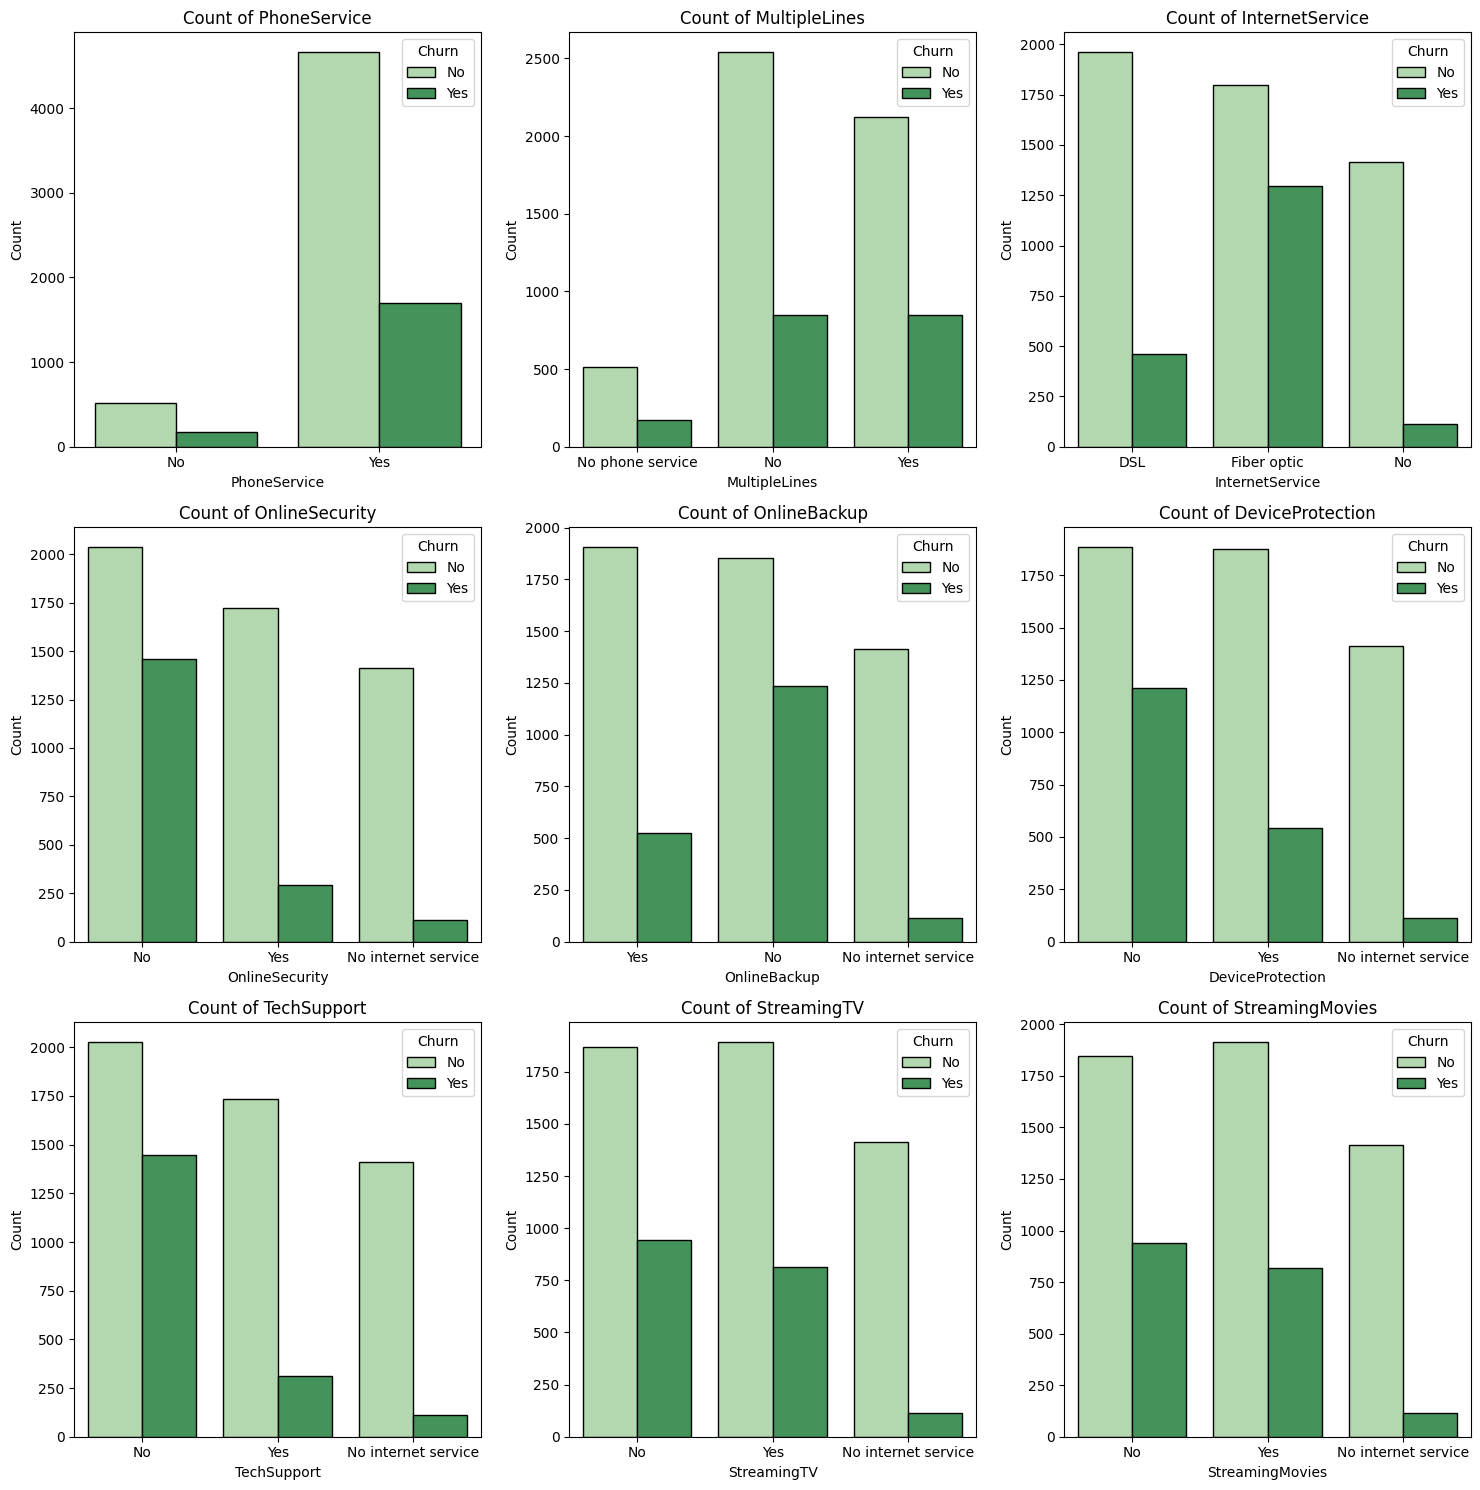

In [13]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a count plot for each specified column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i],hue="Churn", palette='Greens',edgecolor="black")  # Use different color palette
    axes[i].set_title(f'Count of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### from the above graph we see that the people who have phone services, fiber obtic as internet service, No online security, No online backup, No device protection, No tech support, No streaming TV and No streaming movies are churning out the most  

# Creating the predictive model

### encoding the data

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through categorical columns and encode them
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# endoded data:
    ['Female' 'Male'],[0 1]
    ['Yes' 'No'],[0 1]
    ['No' 'Yes'],[1 0]
    ['No' 'Yes'],0,1]
    ['No phone service' 'No' 'Yes'],[1 0 2]
    ['DSL' 'Fiber optic' 'No'],[0 1 2]
    ['No' 'Yes' 'No internet service'],[0 2 1]
    ['Yes' 'No' 'No internet service'],[2 0 1]
    ['No' 'Yes' 'No internet service'],[0 2 1]
    ['No' 'Yes' 'No internet service'],[0 2 1]
    ['No' 'Yes' 'No internet service'],[0 2 1]
    ['No' 'Yes' 'No internet service'],[0 2 1]
    ['Month-to-month' 'One year' 'Two year'],[0 1 2]
    ['Yes' 'No'],[1 0]
    ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'],[2 3 0 1]
    ['No' 'Yes'],[0 1]

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
x=df.drop(columns=['customerID','Churn'])
y=df['Churn']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [18]:
log=LogisticRegression(max_iter=1000)
log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

In [19]:
log.score(x_train,y_train),log.score(x_test,y_test)

(0.8047568335108272, 0.8026969481902059)

In [20]:
print(confusion_matrix(y_test,log.predict(x_test)))
print(classification_report(y_test,log.predict(x_test)))

[[932 108]
 [170 199]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1040
           1       0.65      0.54      0.59       369

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



# Model Deployment and Predictions

In [26]:
data=[[1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,53.85,108,15]]
predict=(log.predict(data))
if predict==0:
    print("Customer was not churn out, Subscribed ",predict)
else:
    print("Customer was churn out, Unsubscribed",predict)

Customer was churn out, Unsubscribed [1]
